# Importing Packages

In [1]:
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Importing and Preprocessing

In [2]:
data_dir = "/kaggle/input/training-handwritten-marathi-character-fusion/Data_set"
data_dir = pathlib.Path(data_dir)
print(data_dir)

/kaggle/input/training-handwritten-marathi-character-fusion/Data_set


In [3]:
ch1 = list(data_dir.glob('C1/*'))
print(ch1[0])
PIL.Image.open(str(ch1[0]))

/kaggle/input/training-handwritten-marathi-character-fusion/Data_set/C1/023_01.jpg


In [4]:
# splitting different in training and validation

img_height,img_width=224,224
batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.25,
  subset="training",
  seed=123,
  label_mode ='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.25,
  subset="validation",
  seed=123,
  label_mode ='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 16652 files belonging to 58 classes.
Using 12489 files for training.
Found 16652 files belonging to 58 classes.
Using 4163 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['C1', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C2', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C3', 'C30', 'C31', 'C32', 'C33', 'C34', 'C35', 'C36', 'C37', 'C38', 'C39', 'C4', 'C40', 'C41', 'C42', 'C43', 'C44', 'C45', 'C46', 'C47', 'C48', 'C49', 'C5', 'C50', 'C51', 'C52', 'C53', 'C54', 'C55', 'C56', 'C57', 'C58', 'C6', 'C7', 'C8', 'C9']


# Develop Model

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Load ResNet50
base_model = ResNet50(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

# Model modification
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    
    # Here, we introduce additional Dense layers.
    Dense(1024, activation="relu"),  # A dense layer with 1024 units and 'relu' activation.
    Dropout(0.5),                     # A dropout layer for regularization (optional).
    Dense(512, activation="relu"),   # Another dense layer with 512 units.
    Dropout(0.5),                     # Another dropout layer for regularization (optional).
    
    Dense(len(train_ds.class_names), activation="softmax")
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 [==============================] - 0s 0us/step


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                        

In [8]:
# creating checkpoints
model_path = "/kaggle/working/Trial2_best_model.h5"

# Define the checkpoint
checkpoint = ModelCheckpoint(model_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")


In [9]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=[checkpoint]  # If you've defined the callback above
)

Epoch 1/20
391/391 [==============================] - ETA: 0s - loss: 3.2480 - accuracy: 0.1517
Epoch 1: val_accuracy improved from -inf to 0.14821, saving model to /kaggle/working/Trial2_best_model.h5
391/391 [==============================] - 143s 247ms/step - loss: 3.2480 - accuracy: 0.1517 - val_loss: 3.3014 - val_accuracy: 0.1482
Epoch 2/20
391/391 [==============================] - ETA: 0s - loss: 1.4582 - accuracy: 0.5467
Epoch 2: val_accuracy improved from 0.14821 to 0.60533, saving model to /kaggle/working/Trial2_best_model.h5
391/391 [==============================] - 83s 210ms/step - loss: 1.4582 - accuracy: 0.5467 - val_loss: 1.4290 - val_accuracy: 0.6053
Epoch 3/20
391/391 [==============================] - ETA: 0s - loss: 0.7135 - accuracy: 0.7757
Epoch 3: val_accuracy improved from 0.60533 to 0.84242, saving model to /kaggle/working/Trial2_best_model.h5
391/391 [==============================] - 83s 211ms/step - loss: 0.7135 - accuracy: 0.7757 - val_loss: 0.5415 - val_ac

In [10]:
from tensorflow.keras.models import load_model
best_model = load_model('/kaggle/working/Trial2_best_model.h5')

In [11]:
val_loss, val_accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


131/131 [==============================] - 13s 95ms/step - loss: 75.1264 - accuracy: 0.0435
Validation Loss: 75.12641906738281
Validation Accuracy: 0.043478261679410934


In [12]:
# best model 
val_loss, val_accuracy = best_model.evaluate(val_ds)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


131/131 [==============================] - 13s 90ms/step - loss: 0.1806 - accuracy: 0.9522
Validation Loss: 0.18063537776470184
Validation Accuracy: 0.9521979093551636


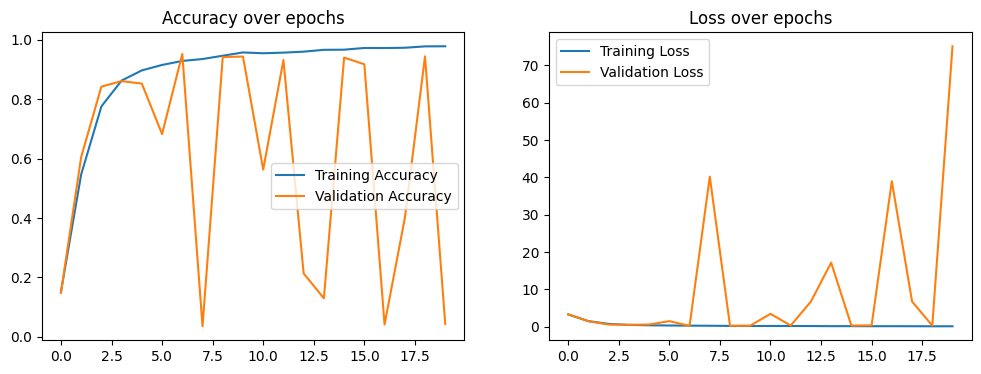

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')

plt.show()


# testing

In [14]:
test_dir = '/kaggle/input/handwritten-marathi-characters-dataset-for-testing/Marathi_Character_dataset'

test_data = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  label_mode ='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 232 files belonging to 58 classes.


In [15]:
result = best_model.evaluate(test_data)
print(result)


8/8 [==============================] - 2s 105ms/step - loss: 0.1732 - accuracy: 0.9569
[0.17321522533893585, 0.9568965435028076]
